In [1]:
%matplotlib notebook
import firedrake
import icepack, icepack.models, icepack.plot

In [2]:
!ls

'AAACJfMxXq1iqVN5WftyiLuaa?dl=0'   measures-antarctica	 README.md
 bedmachine-greenland		   measures-greenland	 realworld.ipynb
 bedmap2			   meshes		 regions
 Firdrake_example.ipynb		   modis-mosaics	 scripts
 lost+found			   python_intro.ipynb	 tutorial-2019-05-20


In [5]:
mesh = firedrake.Mesh('meshes/larsen/larsen.msh')

<IPython.core.display.Javascript object>


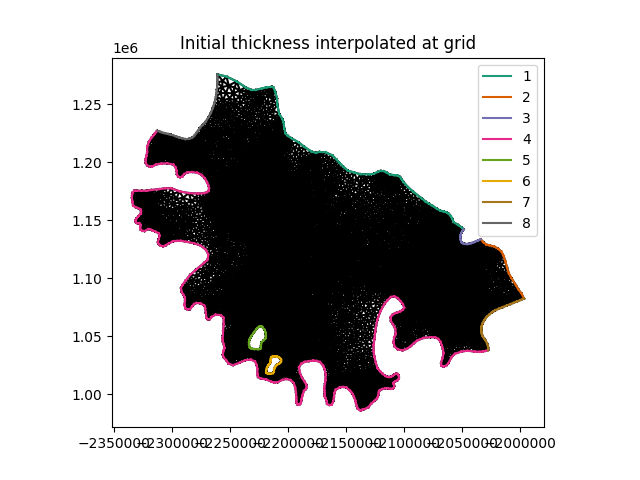

In [6]:
fig,ax  = icepack.plot.subplots()
icepack.plot.triplot(mesh,axes=ax)

In [8]:
#dirichilet : u = something #4 is Dirichlet boundary condition, ice is flowing from upstream
#sidewall : u.v = 0, no flux
#newmann, teminus: M.v = ice_pressure - water_pressure #1,2 calving front

In [9]:
import icepack.grid.geotiff as gtiff
help(gtiff.read)

Help on function read in module icepack.grid.geotiff:

read(filename)
    Read a GeoTIFF file into a gridded data set
    
    Parameters
    ----------
    filename: str or file-like
        name of the input file



In [10]:
velocity_x = gtiff.read('measures-antarctica/larsen-vx.tif')
velocity_y = gtiff.read('measures-antarctica/larsen-vy.tif')
thickness = gtiff.read('bedmap2/larsen-h.tif')

In [19]:
Q = firedrake.FunctionSpace(mesh,family='CG',degree=2)
V = firedrake.VectorFunctionSpace(mesh,family='CG',degree=2)

In [12]:
h = icepack.interpolate(thickness,Q)

<IPython.core.display.Javascript object>


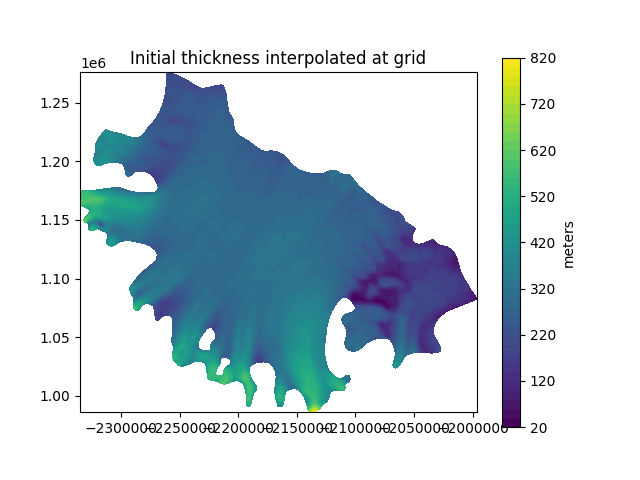

Text(0.5, 1.0, 'Initial thickness interpolated at grid')

In [14]:
fig,axes = icepack.plot.subplots()
contours = icepack.plot.tricontourf(h,40,axes=axes)
colorbar = fig.colorbar(contours,label='meters')
axes.set_title('Initial thickness interpolated at grid')

In [18]:
velocity_y

In [20]:
u = icepack.interpolate((velocity_x,velocity_y),V)

<IPython.core.display.Javascript object>


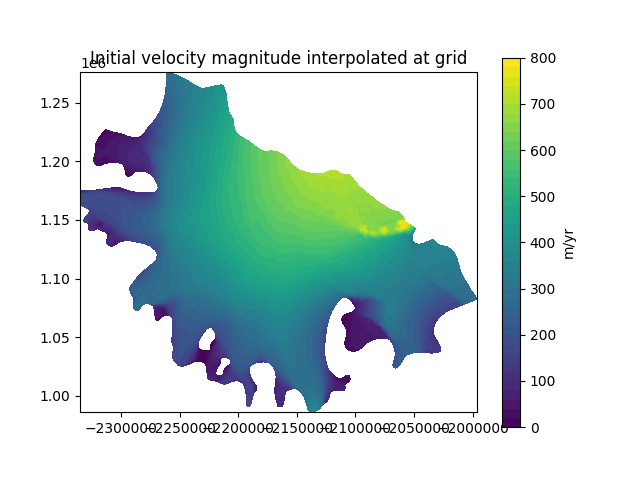

Text(0.5, 1.0, 'Initial velocity magnitude interpolated at grid')

In [21]:
fig,axes = icepack.plot.subplots()
contours = icepack.plot.tricontourf(u,40,axes=axes)
colorbar = fig.colorbar(contours,label='m/yr')
axes.set_title('Initial velocity magnitude interpolated at grid')

In [22]:
ux = firedrake.interpolate(u[0],Q)

<IPython.core.display.Javascript object>


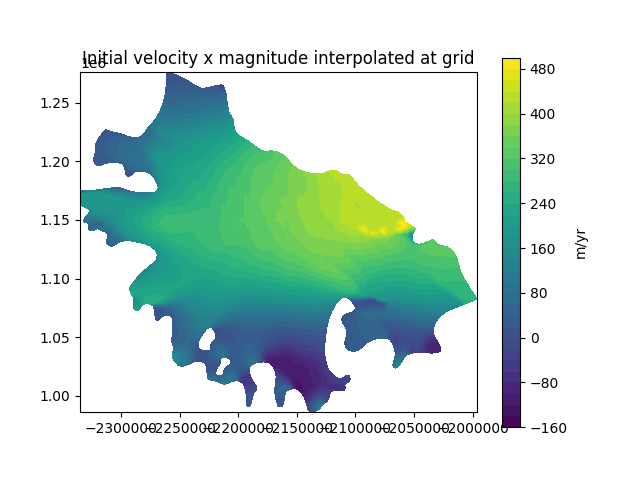

Text(0.5, 1.0, 'Initial velocity x magnitude interpolated at grid')

In [23]:
fig,axes = icepack.plot.subplots()
contours = icepack.plot.tricontourf(ux,40,axes=axes)
colorbar = fig.colorbar(contours,label='m/yr')
axes.set_title('Initial velocity x magnitude interpolated at grid')

In [24]:
from firedrake import dx,ds,inner

In [29]:
n = firedrake.FacetNormal(mesh)
flux = firedrake.assemble(h*inner(u,n)*ds((1,2)))

length = firedrake.assemble(firedrake.Constant(1,domain=mesh)*ds((1,2)))
print(flux/length)

104270.21600408651


In [31]:
T = 260.0
A = firedrake.Constant(icepack.rate_factor(T))

opts = {'dirichlet_ids':[3,4,5,6,7,8]}
model = icepack.models.IceShelf()
v = model.diagnostic_solve(u0=u,h=h,A=A,**opts)

<IPython.core.display.Javascript object>


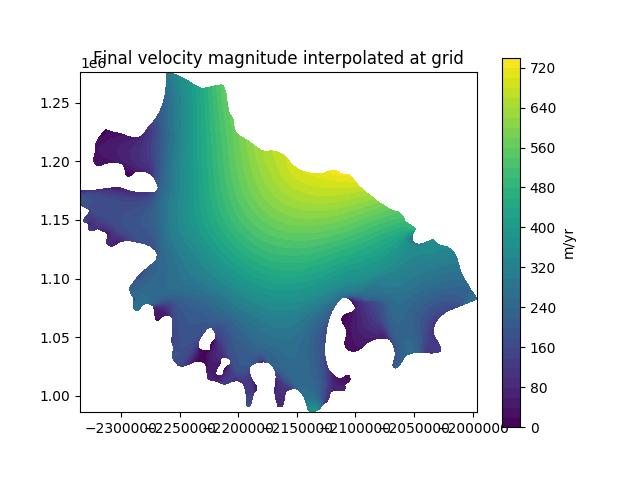

Text(0.5, 1.0, 'Final velocity magnitude interpolated at grid')

In [32]:
fig,axes = icepack.plot.subplots()
contours = icepack.plot.tricontourf(v,40,axes=axes)
colorbar = fig.colorbar(contours,label='m/yr')
axes.set_title('Final velocity magnitude interpolated at grid')

In [ ]:
#hybrid model: Full Stokes equation
